In [4]:
%pylab inline
import pandas as pd
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [8]:
#Importing data
df = pd.read_csv('uber-raw-data-apr14.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [14]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [19]:
# 'Date/Time' column is str rn, convert it into datetime...
df['Date/Time'] = df['Date/Time'].apply(lambda x: pd.to_datetime(x))

In [27]:
# WE NEED TO FIND THE MOST BUSY DAY/WEEK/MONTH
# Create a new column which has the day of month on which the ride was booked...

#List comprehension gets a list which contains the day of month for all entries.
df['DOM'] = [x.day for x in df['Date/Time']]

In [29]:
df.head()

,Date/Time,Lat,Lon,Base,DOM
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [35]:
#CREATE A NEW COLUMN WHICH CONTAINS THE WEEKDAY

df['Weekday'] = [x.weekday() for x in df['Date/Time']]
df

,Date/Time,Lat,Lon,Base,DOM,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23


In [36]:
#CREATE A NEW COLUMN WHICH CONTAINS THE HOUR WHEN THE RIDE WAS BOOKED

df['Hour'] = [x.hour for x in df['Date/Time']]
df

,Date/Time,Lat,Lon,Base,DOM,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
...,...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23


Text(0.5, 1.0, 'Frequency by Date of month')

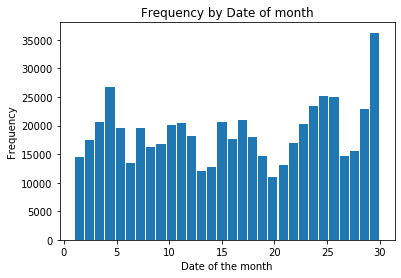

In [43]:

# ANALYSE THE DATA

hist(df.DOM, bins=30, rwidth=0.9)
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by Date of month')

In [45]:
df.groupby('DOM').count()

,Date/Time,Lat,Lon,Base,Weekday,Hour
DOM,,,,,,
1,14546,14546,14546,14546,14546,14546
2,17474,17474,17474,17474,17474,17474
3,20701,20701,20701,20701,20701,20701
4,26714,26714,26714,26714,26714,26714
5,19521,19521,19521,19521,19521,19521
6,13445,13445,13445,13445,13445,13445
7,19550,19550,19550,19550,19550,19550
8,16188,16188,16188,16188,16188,16188
9,16843,16843,16843,16843,16843,16843
